### 과제 - 유방암 데이터 PCA

-2,5,10 차원으로 차원 축소
- 원본과 차원축소한 데이터의 분류 정확도 비교
- 2차원 축소한 것은 시각화

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- 데이터 로딩과 정규화

In [54]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [55]:

df = pd.DataFrame(cancer.data, columns= cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [56]:
import numpy as np
np.unique(cancer.target, return_counts= True)

(array([0, 1]), array([212, 357], dtype=int64))

In [57]:
# PCA 객체 생성

In [58]:
# 2차원 
from sklearn.decomposition import PCA 
pca = PCA(n_components= 2)
cancer_pca = pca.fit_transform(cancer_std)
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

- PCA로 차원 축소

- pca를 할때 왜 정규화하는 걸까?
- 31개의 칼럼들의 데이터의 크기와 사이즈를 균일하게 스케일링 해준다.

In [59]:
from sklearn.preprocessing import StandardScaler      
cancer_std = StandardScaler().fit_transform(cancer.data)

- 차원축소

In [69]:
#2차원
from sklearn.decomposition import PCA 
pca = PCA(n_components= 2) 
cancer_pca = pca.fit_transform(cancer_std)
cancer_pca[:3]

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ]])

In [70]:
pca.explained_variance_ratio_ 

array([0.44272026, 0.18971182])

In [71]:
# 5차원으로 축소
pca2 = PCA(n_components= 5)
cancer_pca2 = pca2.fit_transform(cancer_std)
pca2.explained_variance_ratio_ , sum(pca2.explained_variance_ratio_)

(array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768]),
 0.847342743167986)

In [72]:
# 10차원으로 축소
pca3 = PCA(n_components= 10)
cancer_pca3 = pca3.fit_transform(cancer_std)
pca3.explained_variance_ratio_ , sum(pca3.explained_variance_ratio_)

(array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
        0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978]),
 0.9515688143308856)

- PCA 전후 분류 정확도 비교


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [74]:
# 원본
X_train,X_test, y_train,y_test = train_test_split(
    cancer_std, cancer.target, stratify= cancer.target, test_size = 0.2, random_state=2021
)
lrc = LogisticRegression(random_state=2021)
lrc.fit(X_train,y_train)
acc = lrc.score(X_test, y_test)
acc

1.0

In [75]:
#PCA
X_train,X_test, y_train,y_test = train_test_split(
    cancer_pca, cancer.target, stratify= cancer.target, test_size = 0.2, random_state=2021
)
lrc = LogisticRegression(random_state=2021)
lrc.fit(X_train,y_train)
acc = lrc.score(X_test, y_test)
acc

0.9649122807017544

-PCA 전후 비교

In [85]:
def pca_accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size = 0.2, random_state=2021
    )
    lr = LogisticRegression(random_state=2021)
    lr.fit(X_train, y_train)
    score = lr.score(X_test, y_test)
    return score

정리-1

정리2

In [86]:
for n in [2,5,10,0]:
    if n ==0:
        acc = pca_accuracy(cancer_std, cancer.target)
        print(f'원 데이터 : {acc:.4f}')
    else:
        pca = PCA(n_components=n)
        cancer_pca = pca.fit_transform(cancer_std)
        explained = sum(pca.explained_variance_ratio_)
        acc = pca_accuracy(cancer_pca, cancer.target)
        print(f'PCA {n}: {acc:.4f}, 설명력: {explained:.4f}')


PCA 2: 0.9649, 설명력: 0.6324
PCA 5: 0.9912, 설명력: 0.8473
PCA 10: 0.9912, 설명력: 0.9516
원 데이터 : 1.0000


In [78]:
pca = PCA(n_components= 2) 
cancer_pca = pca.fit_transform(cancer_std)
df['PC1'] = cancer_pca[:,0]
df['PC2'] = cancer_pca[:,1]

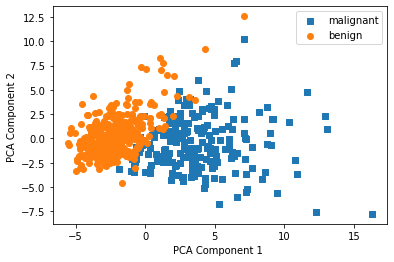

In [81]:
markers = [ 's', 'o']   # 데이터가 0,1밖에 없기 때문에 2개만

for i, marker in enumerate(markers):
    X_data = df[df.target == i]['PC1']
    y_data = df[df.target == i]['PC2']
    plt.scatter(X_data, y_data, marker = marker, label = cancer.target_names[i])
    
plt.legend()
plt.xlabel('PCA Component 1 ')
plt.ylabel('PCA Component 2 ')
plt.show()

- 마커 없이 할려면


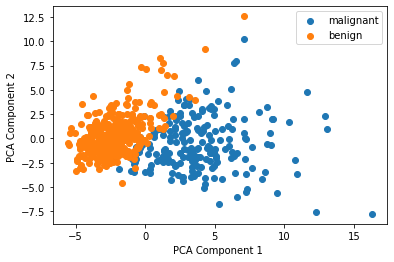

In [84]:


for i in range(2):
    X_data = df[df.target == i]['PC1']
    y_data = df[df.target == i]['PC2']
    plt.scatter(X_data, y_data,  label = cancer.target_names[i])
    
plt.legend()
plt.xlabel('PCA Component 1 ')
plt.ylabel('PCA Component 2 ')
plt.show()